# **Project Part 1**

**Submitted by:**


1.   21L-5340
2.   21L-1858
3.   21L-5248






# **Dataset Description and Features:**

# **Identify your dataset:**

The dataset, sourced from Kaggle, offers a comprehensive range of topics relevant to a college or university environment. It covers various user input patterns paired with corresponding tags and responses to facilitate interactions with a chatbot. The intents encompass a broad spectrum of subjects such as greetings, farewells, academic inquiries (courses, fees, syllabus), administrative matters (admissions, placements), facilities, events, and infrastructure.

Additionally, the dataset includes specific queries related to Instagram functionalities, aligned with the platform's Community Guidelines. These encompass account settings, privacy controls, content moderation, reporting features, and account security. This diversity in topics caters to a wide array of user needs, making the dataset versatile for building an engaging chatbot experience.

# **Links:**

https://www.kaggle.com/datasets/niraliivaghani/chatbot-dataset?select=intents.json

https://help.instagram.com/477434105621119

#**Features:**

The dataset is in JSON format and the features include:

Tag: Describes the category or intent of the user input.

Patterns: Contains various user inputs or queries associated with each tag.

Responses: Provides responses or answers for each tag or intent.


In [ ]:
import json
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

nltk.download('punkt') #for tokenization
nltk.download('wordnet') #for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
file = open('data.json')
data = json.load(file)

df = pd.DataFrame(data['intents'])

In [ ]:
print(data)

{'intents': [{'tag': 'greeting', 'inputs': ['Hi', 'How are you?', 'Is anyone there?', 'Hello', 'Heya', 'Hola', 'Good day', "What's up", 'how are ya', 'heyy', 'whatsup', 'whaddup', '??? ??? ??', 'hey'], 'responses': ['Hello!', 'Good to see you again!', 'Hi there, how can I help?']}, {'tag': 'goodbye', 'inputs': ['cya', 'see you', 'bye bye', 'See you later', 'Goodbye', 'I am Leaving', 'Bye', 'see ya', 'Good day', 'bai', 'go away', 'Have a Good day', 'talk to you later', 'ttyl', 'i got to go', 'gtg', 'Im going', 'Byeeee', 'Byeee', 'Aight bye'], 'responses': ['Sad to see you go :(', 'Talk to you later', 'Goodbye!', 'Come back soon']}, {'tag': 'creator', 'inputs': ['who created instagram', 'who made instagram', 'who are the developers', 'your developers', 'developers', 'creators', 'who made you', 'who owns you', 'who designed you', 'who made this project', 'project members', 'project owners', 'who owns you', 'your owners'], 'responses': ['This project was made by Umamah Hussain, Muhammad Ta

# **Data Preprocessing:**
Since our dataset primarily consists of textual data and does not involve numerical data we won’t perform typical preprocessing tasks related to numerical data.

# **Text Preprocessing includes:**

**Tokenization:** Splitting the text into words or tokens.

**Lemmatization:** Reducing words to their base or root form.

**Vectorization:** Converting text data into numerical vectors suitable for machine learning models.

We use TF-IDF vectorization. TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).




In [ ]:
words = []
tags = []
sentences = []

for intent in data['intents']:
  for pattern in intent['inputs']:
    w = nltk.word_tokenize(pattern)
    words.extend(w)

  if intent['tag'] not in tags:
    tags.append(intent['tag'].lower())

print("Words Initially present in dataset: ")
print(words)

print("\n\nTags present in dataset: ")
print(tags)

Words Initially present in dataset: 
['Hi', 'How', 'are', 'you', '?', 'Is', 'anyone', 'there', '?', 'Hello', 'Heya', 'Hola', 'Good', 'day', 'What', "'s", 'up', 'how', 'are', 'ya', 'heyy', 'whatsup', 'whaddup', '?', '?', '?', '?', '?', '?', '?', '?', 'hey', 'cya', 'see', 'you', 'bye', 'bye', 'See', 'you', 'later', 'Goodbye', 'I', 'am', 'Leaving', 'Bye', 'see', 'ya', 'Good', 'day', 'bai', 'go', 'away', 'Have', 'a', 'Good', 'day', 'talk', 'to', 'you', 'later', 'ttyl', 'i', 'got', 'to', 'go', 'gtg', 'Im', 'going', 'Byeeee', 'Byeee', 'Aight', 'bye', 'who', 'created', 'instagram', 'who', 'made', 'instagram', 'who', 'are', 'the', 'developers', 'your', 'developers', 'developers', 'creators', 'who', 'made', 'you', 'who', 'owns', 'you', 'who', 'designed', 'you', 'who', 'made', 'this', 'project', 'project', 'members', 'project', 'owners', 'who', 'owns', 'you', 'your', 'owners', 'name', 'your', 'name', 'Who', 'is', 'this', '?', 'do', 'you', 'have', 'a', 'name', 'what', 'are', 'you', 'called', 'wha

In [ ]:
#Lemmatization

lemmatizer =  WordNetLemmatizer()
lemmas = []

for word in words:
  w = lemmatizer.lemmatize(word)
  print(word," : ",w)
  lemmas.append(w.lower)

Hi  :  Hi
How  :  How
are  :  are
you  :  you
?  :  ?
Is  :  Is
anyone  :  anyone
there  :  there
?  :  ?
Hello  :  Hello
Heya  :  Heya
Hola  :  Hola
Good  :  Good
day  :  day
What  :  What
's  :  's
up  :  up
how  :  how
are  :  are
ya  :  ya
heyy  :  heyy
whatsup  :  whatsup
whaddup  :  whaddup
?  :  ?
?  :  ?
?  :  ?
?  :  ?
?  :  ?
?  :  ?
?  :  ?
?  :  ?
hey  :  hey
cya  :  cya
see  :  see
you  :  you
bye  :  bye
bye  :  bye
See  :  See
you  :  you
later  :  later
Goodbye  :  Goodbye
I  :  I
am  :  am
Leaving  :  Leaving
Bye  :  Bye
see  :  see
ya  :  ya
Good  :  Good
day  :  day
bai  :  bai
go  :  go
away  :  away
Have  :  Have
a  :  a
Good  :  Good
day  :  day
talk  :  talk
to  :  to
you  :  you
later  :  later
ttyl  :  ttyl
i  :  i
got  :  got
to  :  to
go  :  go
gtg  :  gtg
Im  :  Im
going  :  going
Byeeee  :  Byeeee
Byeee  :  Byeee
Aight  :  Aight
bye  :  bye
who  :  who
created  :  created
instagram  :  instagram
who  :  who
made  :  made
instagram  :  instagram
who  :  who


In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

# Frequency of different intents or tags
tag_counts = df['tag'].value_counts()
print("Frequency of different intents or tags:")
print(tag_counts)

Shape of the DataFrame:
(26, 3)
Frequency of different intents or tags:
tag
greeting          1
goodbye           1
vacation          1
swear             1
random            1
feedback          1
help              1
report_story      1
privacy_policy    1
report            1
comment           1
dislike           1
like              1
delete_post       1
add_post          1
stories           1
explore           1
hashtags          1
profile           1
privacy           1
features          1
contact           1
hours             1
name              1
creator           1
Jokes             1
Name: count, dtype: int64


# **TF-IDF vectorization works as follows:**

**Term Frequency (TF):** It measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document.

**Inverse Document Frequency (IDF):** It measures the importance of a term across a collection of documents (corpus). It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

**TF-IDF:** It is calculated as the product of TF and IDF. It assigns higher weights to terms that are frequent in a document but rare in the corpus.

# **The TF-IDF vectorization process involves the following steps:**

**Fit:** The vectorizer analyzes the text data to learn the vocabulary (unique words) and computes the IDF values for each term in the vocabulary.

**Transform:** The vectorizer transforms the text data into a numerical matrix where each row represents a document, and each column represents a term in the vocabulary. The matrix contains TF-IDF values for each term in each document.

The resulting TF-IDF matrix can then be used as input to train machine learning models for tasks such as classification, clustering, or regression.


# **Methodology:**

Methodology involves using NLTK for text processing and building a chatbot system that can understand user queries and respond accordingly. It uses a tagging system to categorize user inputs and provides predefined responses based on the tags.


In [ ]:
# Extract patterns from the intents
patterns = []
for intent in data['intents']:
    patterns.extend(intent['inputs'])
df = pd.DataFrame(patterns, columns=['text'])

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print("TF-IDF Vectorized Data:")
print(tfidf_df)

TF-IDF Vectorized Data:
     about  abuse  add  aight   am  and  any    anyone  app       are  ...  \
0      0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
1      0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.651428  ...   
2      0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.645825  0.0  0.000000  ...   
3      0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
4      0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
..     ...    ...  ...    ...  ...  ...  ...       ...  ...       ...  ...   
267    0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
268    0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
269    0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
270    0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
271    0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   

     when  where  who  will  with  work

# **Categorical Features:**
Our categorical features are the tags associated with user queries. We can visualize the distribution of these tags.

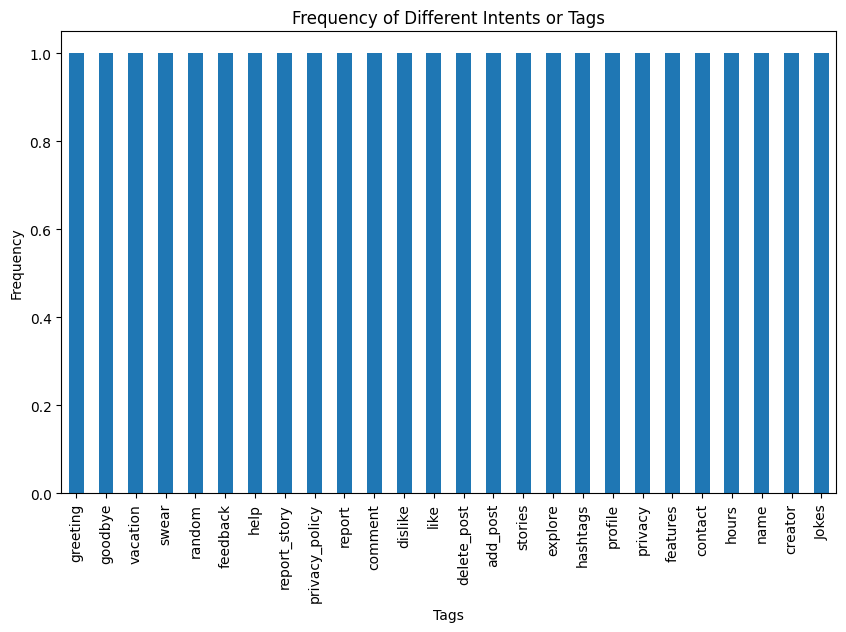

In [ ]:
# Bar chart to visualize tag distribution
tag_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Different Intents or Tags')
plt.show()


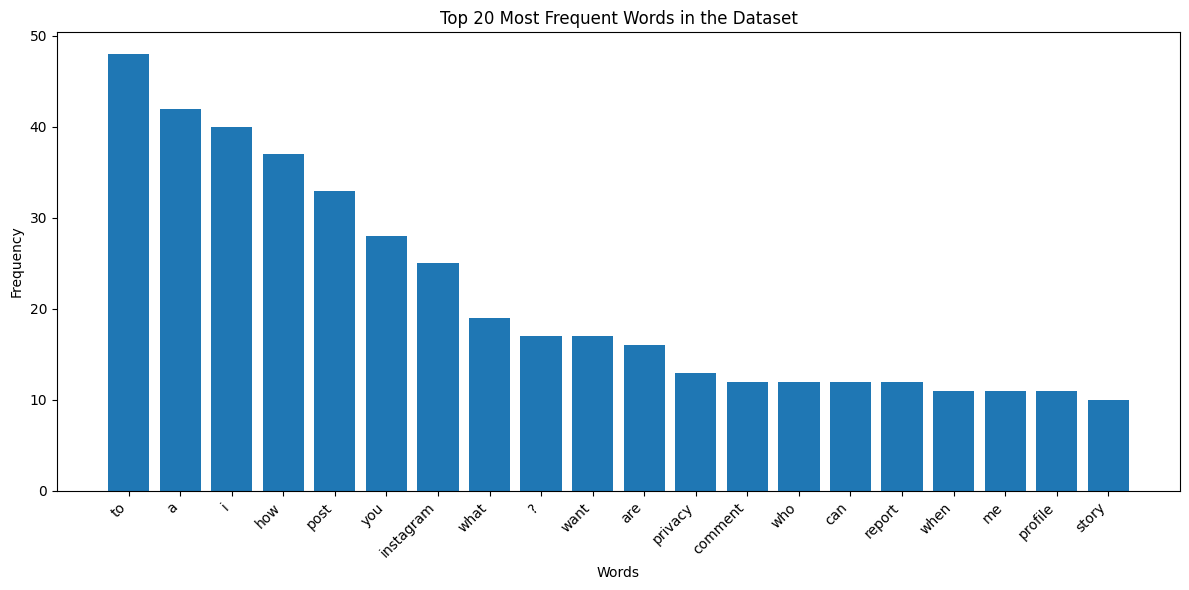

In [ ]:
all_words = [word.lower() for pattern in data['intents'] for pattern in pattern['inputs'] for word in nltk.word_tokenize(pattern)]
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


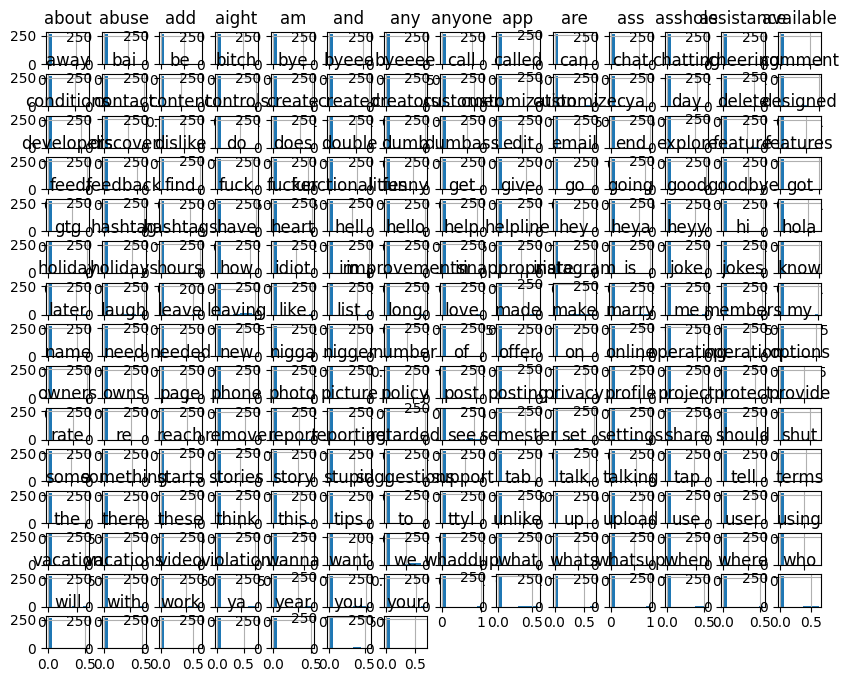

In [ ]:
# Histogram to visualize TF-IDF distribution
tfidf_df.hist(figsize=(10, 8))
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.title('TF-IDF Distribution')
plt.show()


# **Scatter Plots:**
Since we don't have traditional numerical features besides the TF-IDF values, we won't create scatter plots in this case.

# **Pair Plots:**
Since we're dealing with TF-IDF values, which are high-dimensional, creating pair plots wouldn't be practical here.